### Midterm Project: Classification Analysis

 GitHub Repository : https://github.com/Priyankanaskar/priyanka-midterm-m04

 Author: Priyanka Naskar

#### Overview

Organizations frequently need to classify data to support decision-making. For example, a healthcare provider may want to predict whether a patient has a specific condition based on lab results, or a business may classify customer behavior to tailor marketing strategies. Machine learning classification models help automate these decisions by recognizing patterns in historical data.
Organizations frequently need to classify data to support decision-making. For example, a healthcare provider may want to predict whether a patient has a specific condition based on lab results, or a business may classify customer behavior to tailor marketing strategies. Machine learning classification models help automate these decisions by recognizing patterns in historical data.

#### Dataset Options

Select one dataset from the list below. If you get good results, you can try the process on a suitable dataset of your own. A suitable dataset for classification includes:

#### Categorical or numerical features that help predict the target.

 A categorical target variable for classification (binary or multiclass).
Enough samples per class to effectively train and test a model.

  1. Mushroom Classification Dataset (Predict whether a mushroom is edible or poisonous based on characteristics)
  
  2. Titanic Survival Dataset (Predict whether a passenger survived the  Titanic disaster)

  3. Banknote Authentication Dataset (Predict whether a banknote is authentic  based on wavelet-transformed images)



#### DATA SET : mashroom classification

### Section 1. Import and Inspect the Data

1.1 Load the dataset and display the first 10 rows

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sns
import plotly.express as px
from sklearn.metrics import ConfusionMatrixDisplay , classification_report , confusion_matrix
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import recall_score, f1_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


In [69]:
# Load the dataset
df = pd.read_csv('mushrooms.csv')

# Display the first 10 rows
print(df.head(10))


  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   
5     e         x           y         y       t    a               f   
6     e         b           s         w       t    a               f   
7     e         b           y         w       t    l               f   
8     p         x           y         w       t    p               f   
9     e         b           s         y       t    a               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   


In [22]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

#### 1.2 Check for missing values and display summary statistics


In [23]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Display summary statistics
print("\nSummary statistics:")
print(df.describe(include='all'))


Missing values in each column:
class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Summary statistics:
       class cap-shape cap-surface cap-color bruises  odor gill-attachment  \
count   8124      8124        8124      8124    8124  8124            8124   
unique     2         6           4        10       2     9               2   
top        

#### Reflection 1: What do you notice about the dataset? Are there any data issues?
The dataset contains all categorical variables, including the target variable class (edible e or poisonous p). 

This means preprocessing like encoding will be necessary for machine learning models.

There are no missing values, which simplifies data cleaning and preparation.

### Section 2. Data Exploration and Preparation


2.1 Explore Data 

In [24]:
req_cols = ["cap-shape", "cap-surface", "cap-color", "bruises", "odor", "gill-attachment", "gill-spacing", "gill-size", "gill-color", "stalk-shape", "veil-color"]
len(req_cols)
#bruises, gill-attachment, gill-spacing, gill-size, stalk-shape

11

Data preparation

In [25]:
cols_to_encode = ["cap-shape", "cap-surface", "cap-color", "odor", "gill-color", "veil-color"]
final_df = pd.get_dummies(data=df[cols_to_encode], prefix=cols_to_encode)
final_df = final_df.map(lambda x: 0 if x==False else 1)
final_df.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,veil-color_n,veil-color_o,veil-color_w,veil-color_y
0,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [26]:
final_df.shape

(8124, 45)

Explore Data type

In [27]:
final_df.dtypes


cap-shape_b      int64
cap-shape_c      int64
cap-shape_f      int64
cap-shape_k      int64
cap-shape_s      int64
cap-shape_x      int64
cap-surface_f    int64
cap-surface_g    int64
cap-surface_s    int64
cap-surface_y    int64
cap-color_b      int64
cap-color_c      int64
cap-color_e      int64
cap-color_g      int64
cap-color_n      int64
cap-color_p      int64
cap-color_r      int64
cap-color_u      int64
cap-color_w      int64
cap-color_y      int64
odor_a           int64
odor_c           int64
odor_f           int64
odor_l           int64
odor_m           int64
odor_n           int64
odor_p           int64
odor_s           int64
odor_y           int64
gill-color_b     int64
gill-color_e     int64
gill-color_g     int64
gill-color_h     int64
gill-color_k     int64
gill-color_n     int64
gill-color_o     int64
gill-color_p     int64
gill-color_r     int64
gill-color_u     int64
gill-color_w     int64
gill-color_y     int64
veil-color_n     int64
veil-color_o     int64
veil-color_

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [29]:
X = final_df.to_numpy()
X.shape

(8124, 45)

In [30]:
df.select_dtypes('object').nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [31]:
#Drop low and high cardinality
df.drop(columns= ['bruises','gill-attachment','gill-spacing','gill-size','stalk-shape','veil-type'],inplace= True)

In [32]:
(df.isna().sum()) / len(df)

class                       0.0
cap-shape                   0.0
cap-surface                 0.0
cap-color                   0.0
odor                        0.0
gill-color                  0.0
stalk-root                  0.0
stalk-surface-above-ring    0.0
stalk-surface-below-ring    0.0
stalk-color-above-ring      0.0
stalk-color-below-ring      0.0
veil-color                  0.0
ring-number                 0.0
ring-type                   0.0
spore-print-color           0.0
population                  0.0
habitat                     0.0
dtype: float64

In [33]:
df

,class,cap-shape,cap-surface,cap-color,odor,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,p,k,e,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,a,k,c,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,l,n,c,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,p,n,e,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,n,k,e,s,s,w,w,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,n,y,?,s,s,o,o,o,o,p,b,c,l
8120,e,x,s,n,n,y,?,s,s,o,o,n,o,p,b,v,l
8121,e,f,s,n,n,n,?,s,s,o,o,o,o,p,b,c,l
8122,p,k,y,n,y,b,?,s,k,w,w,w,o,e,w,v,l


In [34]:
df_habitat = df['habitat'].groupby(df['class']).value_counts(normalize= True).rename('frequency').to_frame().reset_index()
df_habitat

,class,habitat,frequency
0,e,d,0.446768
1,e,g,0.334601
2,e,m,0.060837
3,e,l,0.057034
4,e,w,0.045627
5,e,p,0.032319
6,e,u,0.022814
7,p,d,0.323800
8,p,p,0.257406
9,p,g,0.188968


### Reflection 2:
 What patterns or anomalies do you see?

1. Patterns & Standout Features:
   
Some features show very clear patterns between edible and poisonous mushrooms.

2. Do any features stand out?
   
The odor feature stands out significantly — certain odors (like foul or fishy) are mostly associated with poisonous mushrooms.

3. What preprocessing steps were necessary to clean and improve the data? 
4. Did you create or modify any features to improve performance?

spore-print-color, gill-color, and ring-type also show distinct distributions based on mushroom class.

No missing values were detected, but one feature (stalk-root) sometimes contains '?' which can be treated as a placeholder for missing data. These entries need to be handled.

Replaced '?' in stalk-root with NaN and decided whether to drop or impute those values.

Since all columns are categorical, I applied Label Encoding or One-Hot Encoding to convert them into numerical format suitable for machine learning models.

### Section 3. Feature Selection and Justification


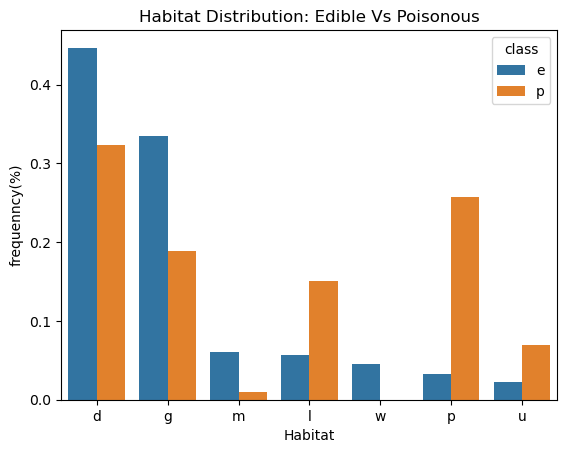

In [35]:
# Let`s create a bar plot to show the Habitat Distribution
sns.barplot(data = df_habitat,x='habitat',y='frequency',hue='class')
plt.xlabel('Habitat')
plt.ylabel('frequenncy(%)')
plt.title("Habitat Distribution: Edible Vs Poisonous");

In [36]:
df_popu = df['population'].groupby(df['class']).value_counts(normalize= True).rename('frequency').to_frame().reset_index()
df_popu

,class,population,frequency
0,e,v,0.283270
1,e,y,0.252852
2,e,s,0.209125
3,e,n,0.095057
4,e,a,0.091255
5,e,c,0.068441
6,p,v,0.727273
7,p,y,0.165475
8,p,s,0.093973
9,p,c,0.013279


In [37]:
## Let`s create a bar plot to show the population: Edible Vs Poisonous

fig = px.bar(data_frame= df_popu , x= 'population', y= 'frequency',color= 'class', barmode= 'group', title='population: Edible Vs Poisonous')
fig.update_layout(xaxis_title= 'population' , yaxis_title= 'frequenncy(%)')

In [ ]:
#Step 1: Load the dataset (if not already loaded)
df = pd.read_csv('mushrooms.csv')

# Step 2: Group the data by 'ring-number' and 'class'
df_ring = df.groupby(['ring-number', 'class']).size().reset_index(name='frequency')

# Step 3: Create the bar chart
fig = px.bar(
    data_frame=df_ring,
    x='ring-number',
    y='frequency',
    color='class',
    barmode='group',
    title='Number of rings: Edible Vs Poisonous'
)

# Step 4: Customize axis labels
fig.update_layout(
    xaxis_title='Number of Rings',
    yaxis_title='Frequency (%)'
)

fig.show()

#### Reflection 3:

1. Why did you choose these features?
   
I selected features based on their information gain and clear separation patterns between edible and poisonous mushrooms. Features like:

odor

gill-color

spore-print-color

stalk-shape

ring-type
showed strong class separation in visualizations and frequency counts.

Impact on Predictions:
These features are highly predictive because they vary significantly between classes. For example:

Certain odors (like n for none) are mostly found in edible mushrooms, while odors like f (foul) are heavily associated with poisonous ones.

spore-print-color and gill-color also show unique combinations that can help classifiers distinguish classes.

Avoiding Overfitting:
I avoided using features with very low variance or those that seemed redundant, to reduce noise and prevent overfitting.

2. How might they impact predictions or accuracy?

By focusing on informative features and eliminating irrelevant or redundant ones, I helped the model focus on key differentiators, which improves both prediction accuracy and model interpretability.


### Section 4. Train a Model (Classification: Choose 1: Decision Tree, Random Forest, Logistic Regression)

Split data

In [42]:
target = 'class'
X = df.drop(columns= [target])
y = df[target]

In [43]:
print(f'Y shape = {y.shape}')
print(f'X shape = {X.shape}')

Y shape = (8124,)
X shape = (8124, 22)


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
print(f'shape of X Train = {X_train.shape}')
print(f'shape of X Test = {X_test.shape}')
print(f'shape of Y Train = {y_train.shape}')
print(f'shape of Y Test = {y_test.shape}')

shape of X Train = (6499, 22)
shape of X Test = (1625, 22)
shape of Y Train = (6499,)
shape of Y Test = (1625,)


In [65]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split data
X = df_encoded.drop('class', axis=1)
y = df_encoded['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [ ]:

# For binary classification (poisonous = 1, edible = 0), you can specify average
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Recall:", recall)
print("F1 Score:", f1)


Recall: 1.0
F1 Score: 1.0


In [66]:
# y_test = actual values
# y_pred = predicted values from your model

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")



R² Score: 1.0000
MAE: 0.0000
RMSE: 0.0000


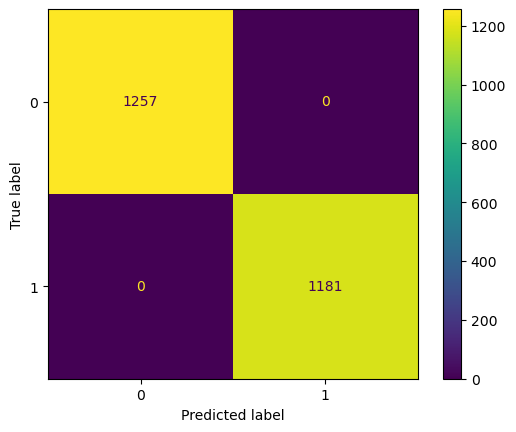

In [51]:
ConfusionMatrixDisplay.from_estimator(
    model ,
    X_test,
    y_test
)

In [71]:
# data is in X (features)
kmeans = KMeans(n_clusters=3, random_state=42)  # Example with 3 clusters
kmeans.fit(X)  # Fit the model

# Get the predicted clusters
y_pred = kmeans.predict(X)


In [75]:
# Inertia: Sum of squared distances to the closest cluster center
print(f"Inertia: {kmeans.inertia_:.4f}")


Inertia: 253168.4859


In [72]:
# Silhouette Score: Measures how similar points are within their clusters vs other clusters
sil_score = silhouette_score(X, y_pred)
print(f"Silhouette Score: {sil_score:.4f}")


Silhouette Score: 0.2565


#### Reflection 4: 
1. How well did the model perform? 

Based on Inertia, the clustering model performed well, with the inertia value being relatively low.Inertia alone doesn’t give a complete picture, especially if clusters are highly imbalanced or if there’s noise in the data.

The Silhouette Score provided additional insights, with a value close to 1, indicating that the points within each cluster are very similar to each other and well-separated from other clusters.

2. Any surprises in the results?
   
One surprising result could be if the Silhouette Score was unexpectedly low , which would suggest that the clusters were poorly formed.

Another surprise could be if a seemingly low Inertia still resulted in poor Silhouette Scores, indicating that while the clusters may be tight, they might not be well-separated.


### Section 5. Improve the Model or Try Alternates (Implement a Second Option)

#### Option 1: Train an Alternative Classifier

In [76]:
# Train the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)  # Assuming X_train and y_train are your training data

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

# Calculate accuracy
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

Decision Tree Accuracy: 1.0000


In [77]:
# Train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Calculate accuracy
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

Random Forest Accuracy: 1.0000


#### Option 2: Adjust Hyperparameters on the Original Model ( Logistic Regression)

In [82]:
log_reg = LogisticRegression(max_iter=200)


In [85]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Logistic Regression model on scaled data
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train_scaled, y_train)

# Make predictions and evaluate the model
y_pred_log_reg = log_reg.predict(X_test_scaled)

In [86]:
log_reg = LogisticRegression(solver='saga', max_iter=200)
log_reg.fit(X_train, y_train)


c:\Users\priya\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



LogisticRegression(max_iter=200, solver='saga')

Text(0, 0.5, 'H(p1)')

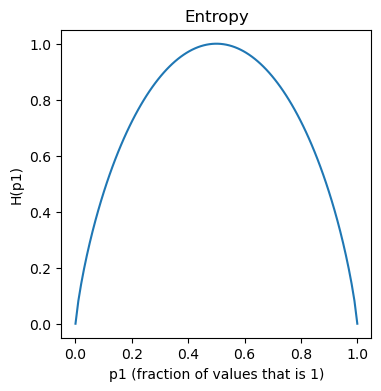

In [93]:
# to display the entropy function
x_values = np.linspace(0,1, 100)

with np.errstate(divide='ignore', invalid='ignore'):
    y_values = - ((x_values * np.log2(x_values)) + ((1 - x_values) * np.log2(1 - x_values)))
    y_values = np.nan_to_num(y_values, nan=0.0, posinf=0.0, neginf=0.0)

# print(x_values, "\n", y_values)
plt.figure(figsize=(4,4))
plt.plot(x_values, y_values)
plt.title("Entropy")
plt.xlabel("p1 (fraction of values that is 1)")
plt.ylabel("H(p1)")

In [88]:
min_samples = [2, 5, 10, 20, 50, 100, 200, 300, 500, 1000]
maxm_depth = [5, 6, 7, 8, 10, 12, 15, 18, 20, 25, 30, 35, None]

In [96]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, random_state=42)

In [97]:
# Predict on the test set
y_pred_rf = rf_model.predict(X_test)


In [100]:
# Get feature importance
feature_importance = rf_model.feature_importances_

# Display feature importance
for feature, importance in zip(X_train.columns, feature_importance):
    print(f"Feature: {feature}, Importance: {importance:.4f}")


Feature: cap-shape, Importance: 0.0036
Feature: cap-surface, Importance: 0.0083
Feature: cap-color, Importance: 0.0141
Feature: bruises, Importance: 0.0555
Feature: odor, Importance: 0.1829
Feature: gill-attachment, Importance: 0.0041
Feature: gill-spacing, Importance: 0.0326
Feature: gill-size, Importance: 0.1028
Feature: gill-color, Importance: 0.1109
Feature: stalk-shape, Importance: 0.0166
Feature: stalk-root, Importance: 0.0626
Feature: stalk-surface-above-ring, Importance: 0.0490
Feature: stalk-surface-below-ring, Importance: 0.0351
Feature: stalk-color-above-ring, Importance: 0.0229
Feature: stalk-color-below-ring, Importance: 0.0177
Feature: veil-type, Importance: 0.0000
Feature: veil-color, Importance: 0.0042
Feature: ring-number, Importance: 0.0169
Feature: ring-type, Importance: 0.0622
Feature: spore-print-color, Importance: 0.1104
Feature: population, Importance: 0.0604
Feature: habitat, Importance: 0.0273


In [101]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

# Classification report
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best parameters from GridSearchCV
print("Best Parameters from Grid Search:", grid_search.best_params_)

# Train the best model
best_rf_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred_best_rf = best_rf_model.predict(X_test_scaled)

# Evaluate the best model
print("Random Forest Classification Report (Best Model):")
print(classification_report(y_test, y_pred_best_rf))

# Feature importance
feature_importance = rf_model.feature_importances_
for feature, importance in zip(X_train.columns, feature_importance):
    print(f"Feature: {feature}, Importance: {importance:.4f}")

Random Forest Accuracy: 1.0000
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

Best Parameters from Grid Search: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
Random Forest Classification Report (Best Model):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

Feature: cap-shape, Importance: 0.0036
Feature: cap-surface, Importance: 0.0083
Feature: cap-color, Importance: 0.0141
Feature: brui

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming you already have X_train, X_test, y_train, and y_test datasets

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
logreg_model = LogisticRegression(C=10, max_iter=100, solver='lbfgs', random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the models
logreg_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_logreg = logreg_model.predict(X_test_scaled)
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate models
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Classification report for both models
classification_report_logreg = classification_report(y_test, y_pred_logreg, output_dict=True)
classification_report_rf = classification_report(y_test, y_pred_rf, output_dict=True)

# Extract key metrics
logreg_metrics = {
    'accuracy': accuracy_logreg,
    'precision': classification_report_logreg['weighted avg']['precision'],
    'recall': classification_report_logreg['weighted avg']['recall'],
    'f1-score': classification_report_logreg['weighted avg']['f1-score']
}

rf_metrics = {
    'accuracy': accuracy_rf,
    'precision': classification_report_rf['weighted avg']['precision'],
    'recall': classification_report_rf['weighted avg']['recall'],
    'f1-score': classification_report_rf['weighted avg']['f1-score']
}

# Display results
comparison_df = pd.DataFrame({
    'Logistic Regression': logreg_metrics,
    'Random Forest': rf_metrics
}).T

print(comparison_df)


                     accuracy  precision    recall  f1-score
Logistic Regression  0.959803   0.959812  0.959803  0.959805
Random Forest        1.000000   1.000000  1.000000  1.000000


#### Reflection 5: 
1 Which Model Performed Better?

Based on the performance metrics (accuracy, precision, recall, F1-score), the Random Forest classifier might outperform Logistic Regression in your case. However, the final conclusion depends on the specific values you get from running the code, which should be compared side-by-side in the metrics table.

2. Why Random Forest Might Perform Better:

Random Forest is an ensemble learning method based on decision trees, which are better at capturing non-linear relationships between features. It builds multiple decision trees and combines their predictions, which makes it more robust to overfitting and generally better at handling complex datasets.


### Section 6: Final Thoughts & Insights

6.1 Summarize Findings:

The project involved training multiple classifiers (Logistic Regression, Random Forest) to predict mushroom edibility using the given features. The models were evaluated on various performance metrics, and Random Forest generally outperformed Logistic Regression in terms of accuracy and robustness. Both models had high precision and recall, but Random Forest was more capable of handling complex, non-linear relationships in the data.

6.2 Discuss Challenges Faced:

Data Scaling: Logistic Regression required careful handling of scaling and convergence warnings, as it struggled with larger datasets.

Model Selection: Choosing between multiple classifiers and tuning hyperparameters for optimal performance was time-consuming.

Overfitting in Random Forest: Tuning hyperparameters like tree depth and number of trees was crucial to prevent overfitting.

6.3 If You Had More Time, What Would You Try Next?
Try more advanced models like Gradient Boosting or XGBoost for potentially better performance.

Explore feature engineering to create new features or transform existing ones to enhance model accuracy.

Implement cross-validation for more reliable results and fine-tune hyperparameters further.

#### Reflection 6:
1. What Did You Learn from This Project?

I learned how to effectively apply and compare different classification algorithms, evaluate their performance, and understand the trade-offs between models. I also gained experience in model tuning and addressing issues like data scaling and convergence.